# Text Only Model with records where age == 'not available' are replaced with Average Age

In [ ]:
from transformers import CLIPProcessor, CLIPModel
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dropout, BatchNormalization
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files

# This will prompt you to upload a file
uploaded = files.upload()

Saving BrEaST-Lesions-USG-clinical-data-Dec-15-2023.xlsx to BrEaST-Lesions-USG-clinical-data-Dec-15-2023 (7).xlsx


In [ ]:
#file_path = "C:\\Users\\alan\\Medical Image Project\\combine_data\\BrEaST-Lesions-USG-clinical-data-Dec-15-2023.xlsx"
file_name = "BrEaST-Lesions-USG-clinical-data-Dec-15-2023.xlsx"
text_data = pd.read_excel(file_name)

In [ ]:
filtered_text_data = text_data[(text_data['Classification'] == 'benign') | (text_data['Classification'] == 'malignant')]

In [ ]:
# Convert 'Age' column to numeric, replacing 'not available' with NaN
filtered_text_data['Age'] = pd.to_numeric(filtered_text_data['Age'].replace('not available', np.nan), errors='coerce')

# Calculate the average age, ignoring NaN values
average_age = filtered_text_data['Age'].mean()

average_age = int(average_age)

# Replace NaN values in 'Age' with the integer average age
filtered_text_data['Age'] = filtered_text_data['Age'].fillna(average_age)

filtered_text_data.head(10)

<ipython-input-5-93ab640a643d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_text_data['Age'] = pd.to_numeric(filtered_text_data['Age'].replace('not available', np.nan), errors='coerce')
<ipython-input-5-93ab640a643d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_text_data['Age'] = filtered_text_data['Age'].fillna(average_age)


,CaseID,Image_filename,Mask_tumor_filename,Mask_other_filename,Pixel_size,Age,Tissue_composition,Signs,Symptoms,Shape,...,Echogenicity,Posterior_features,Halo,Calcifications,Skin_thickening,Interpretation,BIRADS,Verification,Diagnosis,Classification
0,1,case001.png,case001_tumor.png,NaN,0.007812,57.0,heterogeneous: predominantly fat,breast scar,family history of breast/ovarian cancer,irregular,...,heterogeneous,shadowing,no,no,yes,Breast scar (surgery)&Breast scar (radiotherapy),2,confirmed by follow-up care,not applicable,benign
1,2,case002.png,case002_tumor.png,NaN,0.006462,53.0,homogeneous: fat,not available,not available,oval,...,hypoechoic,no,no,no,no,Dysplasia&Fibroadenoma,4b,confirmed by biopsy,Intramammary lymph node,benign
2,3,case003.png,case003_tumor.png,NaN,0.006944,56.0,heterogeneous: predominantly fat,no,nipple discharge,oval,...,hyperechoic,no,no,no,no,Duct filled with thick fluid&Intraductal papil...,4a,confirmed by biopsy,Usual ductal hyperplasia (UDH)&Pseudoangiomato...,benign
3,4,case004.png,case004_tumor.png,NaN,0.007812,43.0,homogeneous: fibroglandular,no,no,round,...,hypoechoic,no,no,no,no,Cyst filled with thick fluid,3,confirmed by follow-up care,not applicable,benign
4,5,case005.png,case005_tumor.png,NaN,0.007812,67.0,homogeneous: fat,nipple retraction&palpable,family history of breast/ovarian cancer,oval,...,complex cystic/solid,enhancement,no,no,no,Suspicion of malignancy&Intraductal papilloma,4b,confirmed by biopsy,Encapsulated papillary carcinoma&Ductal carcin...,malignant
5,6,case006.png,case006_tumor.png,NaN,0.007812,56.0,heterogeneous: predominantly fat,no,HRT/hormonal contraception,irregular,...,heterogeneous,no,no,intraductal,no,Suspicion of malignancy&Intraductal papilloma&...,4b,confirmed by biopsy,Fibrosclerosis,benign
6,7,case007.png,case007_tumor.png,NaN,0.007812,52.0,heterogeneous: predominantly fat,palpable,not available,irregular,...,hypoechoic,shadowing,no,no,no,Suspicion of malignancy,5,confirmed by biopsy,Invasive carcinoma of no special type (NST),malignant
7,8,case008.png,case008_tumor.png,NaN,0.005902,53.0,heterogeneous: predominantly fat,no,no,irregular,...,hypoechoic,shadowing,no,no,no,Suspicion of malignancy,5,confirmed by biopsy,Invasive carcinoma of no special type (NST),malignant
8,9,case009.png,case009_tumor.png,NaN,0.010355,76.0,heterogeneous: predominantly fibroglandular,no,not available,irregular,...,hypoechoic,no,no,no,no,Suspicion of malignancy&Dysplasia,4b,confirmed by biopsy,Fibrosclerosis,benign
9,10,case010.png,case010_tumor.png,NaN,0.010780,34.0,not available,not available,not available,irregular,...,hypoechoic,enhancement,yes,no,no,Suspicion of malignancy&Dysplasia&Fibroadenoma...,4c,confirmed by biopsy,Invasive carcinoma of no special type (NST)&Du...,malignant


In [ ]:
# Combine the relevant columns into a single text field per case
text_columns = [col for col in filtered_text_data.columns if col not in ['Image_filename', 'Classification', "Mask_tumor_filename", "Mask_other_filename", "Pixel_size", "Verification", "BIRADS"]]
filtered_text_data['combined_text'] = filtered_text_data[text_columns].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)

<ipython-input-6-3b89ecf8e615>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_text_data['combined_text'] = filtered_text_data[text_columns].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)


In [ ]:
model_name = "openai/clip-vit-base-patch32"
processor = CLIPProcessor.from_pretrained(model_name)
model = CLIPModel.from_pretrained(model_name)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
# Process text data only
text_inputs = processor(text=filtered_text_data["combined_text"].tolist(), padding=True, truncation=True, return_tensors="pt")
text_embeddings = model.get_text_features(**text_inputs)
text_embeddings.shape

torch.Size([252, 512])

In [ ]:
labels = filtered_text_data['Classification'].values
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

X = text_embeddings.detach().numpy()
X_train, X_test, y_train, y_test = train_test_split(X, encoded_labels, test_size=0.2, random_state=42)

In [ ]:
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.2),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.4, verbose=1)

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)

print(f"Test Loss: {test_loss}\nTest Accuracy: {test_accuracy}")

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.6152 - loss: 0.6739 - val_accuracy: 0.7407 - val_loss: 0.6144
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7792 - loss: 0.4854 - val_accuracy: 0.9630 - val_loss: 0.5382
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8865 - loss: 0.3227 - val_accuracy: 0.9753 - val_loss: 0.4594
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9423 - loss: 0.2893 - val_accuracy: 0.9877 - val_loss: 0.3851
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9550 - loss: 0.1976 - val_accuracy: 0.9877 - val_loss: 0.3184
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9765 - loss: 0.1400 - val_accuracy: 0.9877 - val_loss: 0.2649
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9767 - loss: 0.1122 - val_accuracy: 0.9877 - val_loss: 0.2255
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9946 - loss: 0.0638 - val_accuracy: 0.9753 - val_loss: 0.1978


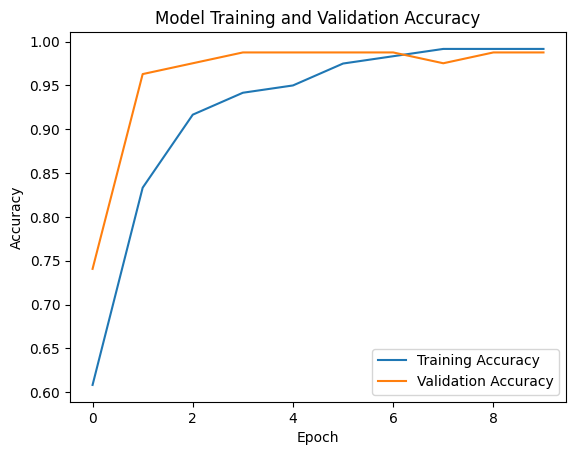

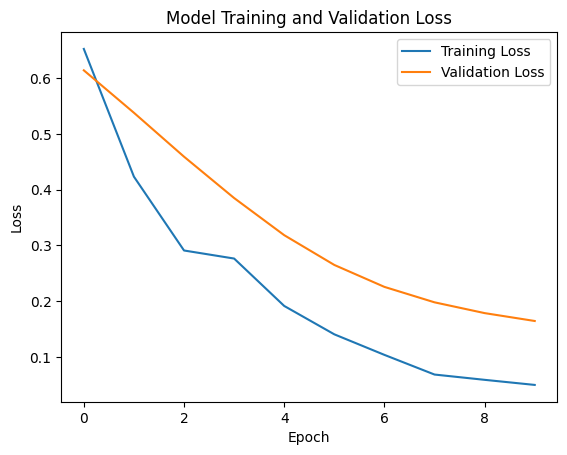

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import f1_score

y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
F1 Score: 1.0
